# Regresión Logísitica
---

La regresión logísitica es un modelo que puede predecir la probabilidad que tiene una variable binaria (que puede aceptar 2 valores) de pertenecer a una clase o a otra.

Es por tanto un método utilizado para la clasificación categórica de variables, especialmente útil por su simplicidad e interpretabilidad

In [ ]:
pip install BeautifulTable

In [ ]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 2. Importar datos
url= "/content/drive/MyDrive/CENFOTEC/Compras.csv"
data = pd.read_csv(url)
data.head(10)

,Identificador,Sexo,Edad,Salario,Compra
0,15624510,Hombre,19,19000,0
1,15810944,Hombre,35,20000,0
2,15668575,Mujer,26,43000,0
3,15603246,Mujer,27,57000,0
4,15804002,Hombre,19,76000,0
5,15728773,Hombre,27,58000,0
6,15598044,Mujer,27,84000,0
7,15694829,Mujer,32,150000,1
8,15600575,Hombre,25,33000,0
9,15727311,Mujer,35,65000,0


In [ ]:
# Dividir los datos en características (X) y variable objetivo o dependiente (y)
X = data[['Edad', 'Salario']]  #variables independientes
y = data['Compra']


La función train_test_split se utiliza para dividir los datos en subconjuntos aleatorios. A continuación, explicaré qué se está haciendo en cada parte de esta línea de código:

`X y y`: Son las matrices o DataFrames que contienen las características (X) y la variable objetivo (y) respectivamente. Estos son los datos que deseamos dividir en conjuntos de entrenamiento y prueba.

`test_size`: Especifica el tamaño o proporción de los datos que se asignarán al conjunto de prueba. En este caso, se ha establecido en 0.2, lo que significa que el 20% de los datos se utilizarán como conjunto de prueba, mientras que el 80% restante se utilizará como conjunto de entrenamiento.

`random_state`: Es un número entero que se utiliza como semilla o "seed" para asegurar que la división de los datos sea reproducible. Al proporcionar un número específico (por ejemplo, 42), garantizamos que obtendremos la misma división de datos cada vez que se ejecute el código.

`X_train, X_test, y_train, y_test`: Son los conjuntos de entrenamiento y prueba resultantes después de la división. `X_train` y `y_train` contienen las características y la variable objetivo respectivamente para el conjunto de entrenamiento, mientras que `X_test` y `y_test` contienen las características y la variable objetivo respectivamente para el conjunto de prueba.

Al dividir los datos en conjuntos de entrenamiento y prueba, nos aseguramos de que podamos evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento. Esto es importante para evaluar la capacidad del modelo para generalizar y realizar predicciones precisas en nuevos datos.


In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


En este paso, se crea una instancia del modelo de regresión logística utilizando la clase LogisticRegression de `scikit-learn`. El modelo de regresión logística es un algoritmo de aprendizaje supervisado utilizado para problemas de clasificación. Al crear el modelo, se están configurando los parámetros predeterminados del modelo.

In [ ]:
# Crear una instancia del modelo de regresión logística
model = LogisticRegression()


Una vez creado el modelo, se utiliza el conjunto de entrenamiento (`X_train y y_train`) para entrenarlo. Esto implica que el modelo aprenda a hacer predicciones basándose en las características proporcionadas (`X_train`) y las correspondientes clases reales (`y_train`). Durante el entrenamiento, el modelo ajusta los coeficientes y los interceptos de la regresión logística para encontrar el mejor ajuste a los datos de entrenamiento.

In [ ]:
# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)


LogisticRegression()

Una vez que el modelo ha sido entrenado, se utiliza para realizar predicciones en el conjunto de prueba (`X_test`). Las características del conjunto de prueba se proporcionan al modelo, que luego asigna una clase predicha a cada instancia de prueba basada en las características aprendidas durante el entrenamiento. Estas predicciones se almacenan en la variable `y_pred`.

In [ ]:
# Realizar predicciones con los datos de prueba
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Calcular las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de Confusión:")
print(cm)

# Imprimir las métricas de evaluación
print("\nPrecisión del modelo: {:.2f}%".format(accuracy * 100))
#print("Recall del modelo: {:.2f}%".format(recall * 100))



Matriz de Confusión:
[[52  0]
 [28  0]]

Precisión del modelo: 65.00%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Si tienes una precisión (accuracy) del 65%, esto significa que el 65% de las predicciones realizadas por tu modelo son correctas. Para calcular el valor numérico correspondiente al 65% de precisión, simplemente multiplicas el porcentaje por el número total de predicciones

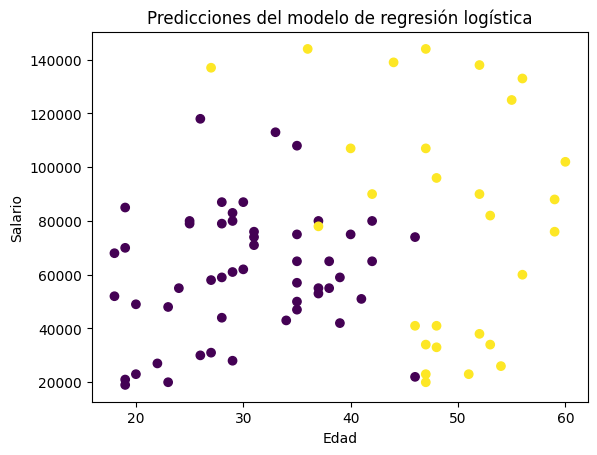

In [ ]:
# Graficar los resultados
plt.scatter(X_test['Edad'], X_test['Salario'], c=y_test)
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.title('Predicciones del modelo de regresión logística')
plt.show()
